Text(0.5, 1.0, 'Disrupted')

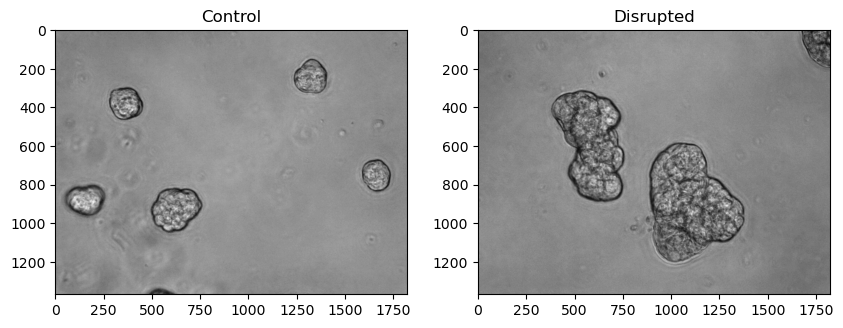

In [2]:

import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread
control = imread('3D_examples/MCF10_controle_1.tif')[:,:,0] 
disrupted = imread('3D_examples/MCF10_disrupted_1.tif')[:,:,0] 
fig, axs = plt.subplots(1,2, figsize=(10,7))
axs[0].imshow(control, cmap='gray')
# axs[0].axis('off')
axs[0].set_title('Control')
axs[1].imshow(disrupted, cmap='gray') 
# axs[1].axis('off')
axs[1].set_title('Disrupted')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1000x2000 with 8 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Isodata'}>,
        <AxesSubplot: title={'center': 'Li'}>,
        <AxesSubplot: title={'center': 'Mean'}>,
        <AxesSubplot: title={'center': 'Minimum'}>,
        <AxesSubplot: title={'center': 'Otsu'}>,
        <AxesSubplot: title={'center': 'Triangle'}>,
        <AxesSubplot: title={'center': 'Yen'}>], dtype=object))

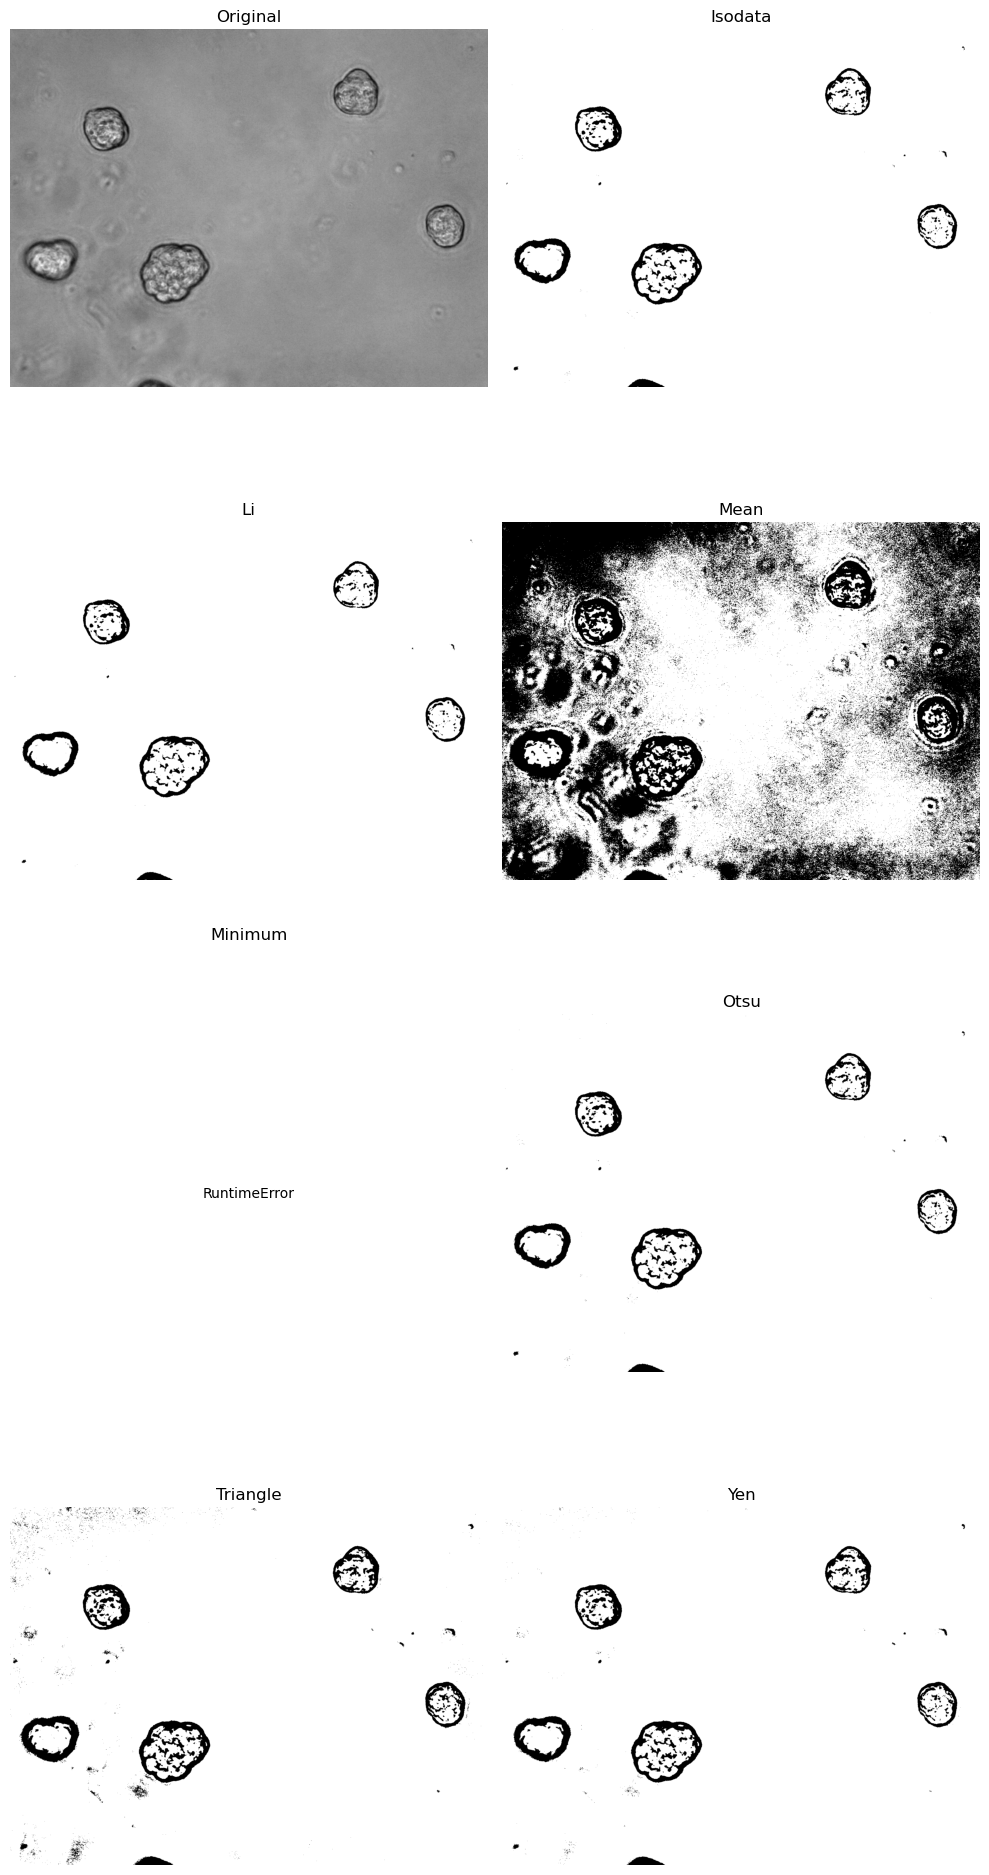

In [3]:
from skimage.filters import try_all_threshold
try_all_threshold(control, figsize=(10,20))

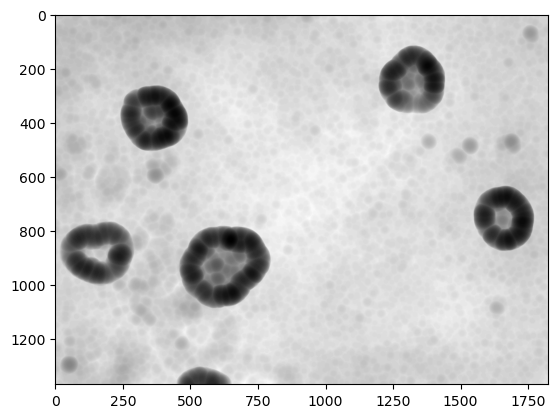

In [4]:
from skimage.restoration import rolling_ball
background = rolling_ball(control, radius= 40)
plt.imshow(background, cmap='gray')

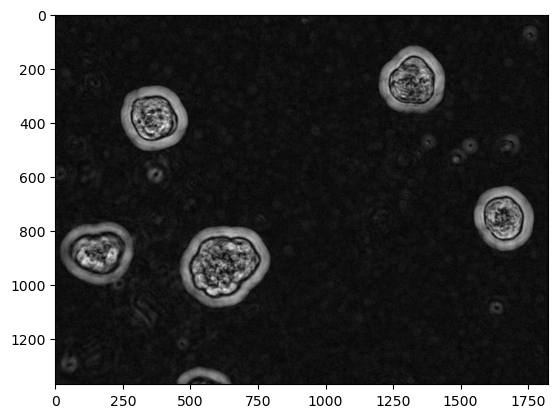

In [6]:
control_bg = control - background
plt.imshow(control_bg, cmap='gray')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1000x2000 with 8 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Isodata'}>,
        <AxesSubplot: title={'center': 'Li'}>,
        <AxesSubplot: title={'center': 'Mean'}>,
        <AxesSubplot: title={'center': 'Minimum'}>,
        <AxesSubplot: title={'center': 'Otsu'}>,
        <AxesSubplot: title={'center': 'Triangle'}>,
        <AxesSubplot: title={'center': 'Yen'}>], dtype=object))

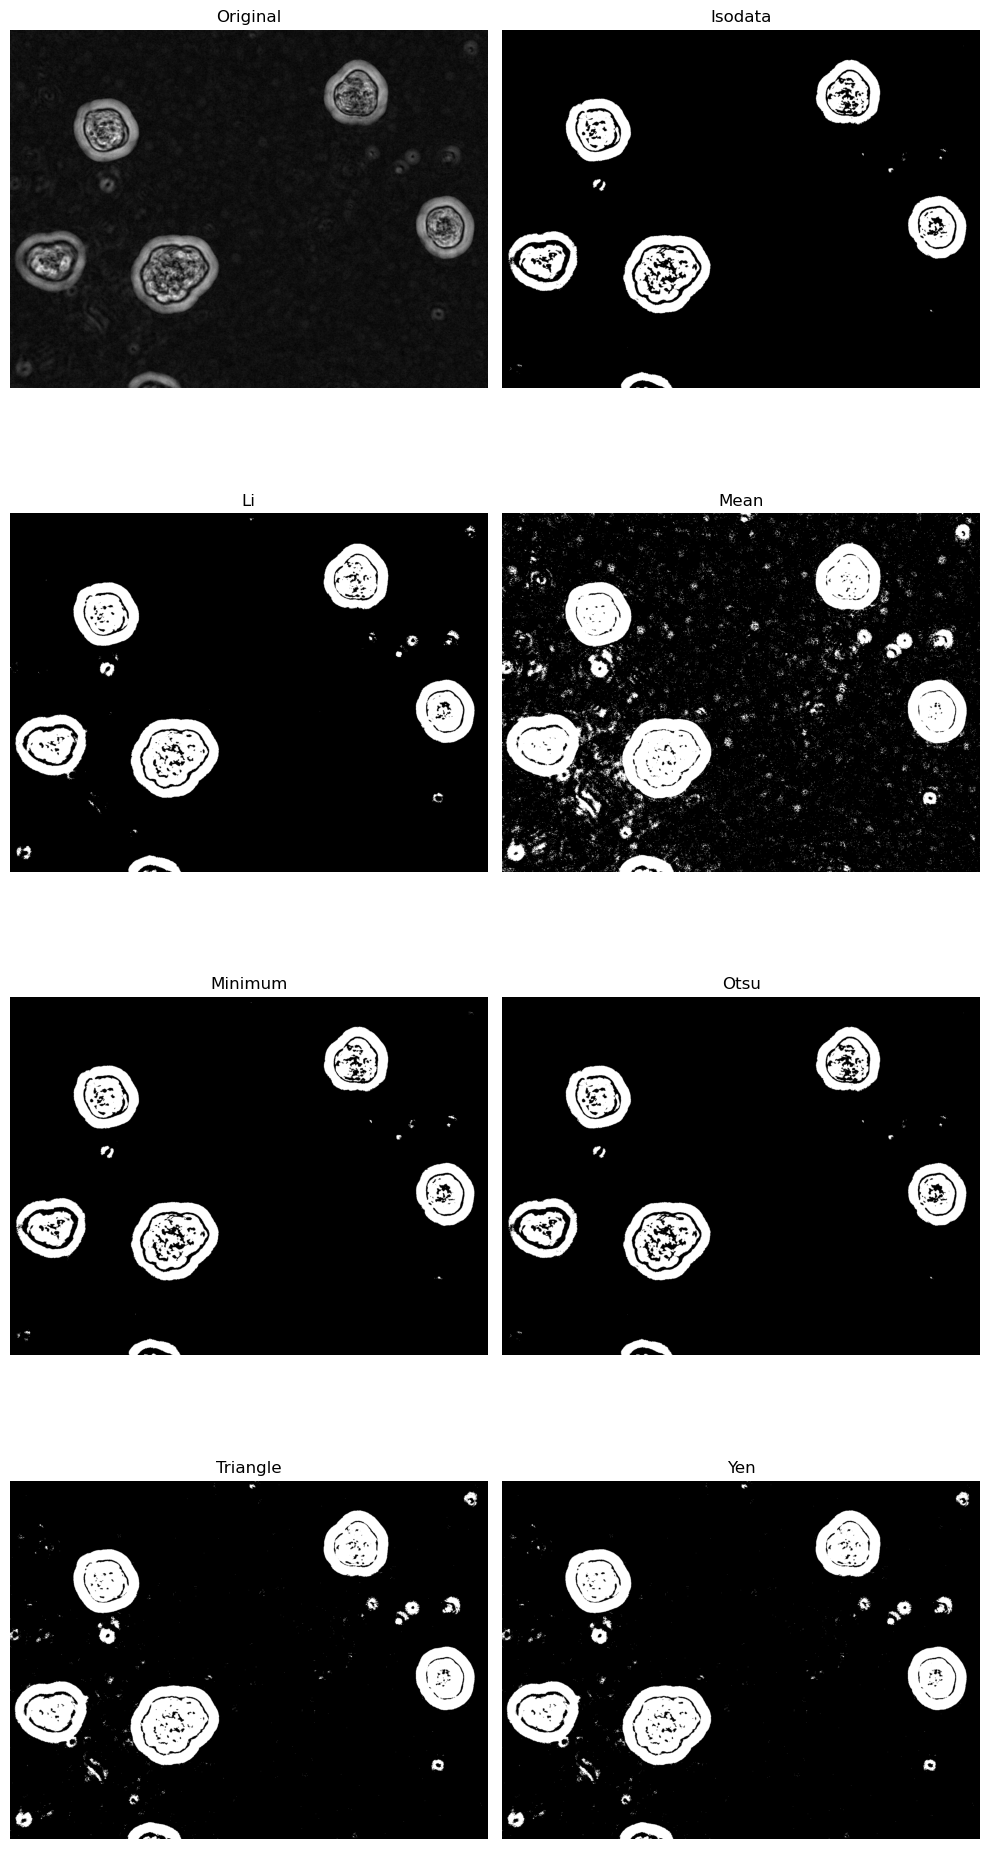

In [7]:
from skimage.filters import try_all_threshold
try_all_threshold(control_bg, figsize=(10,20))

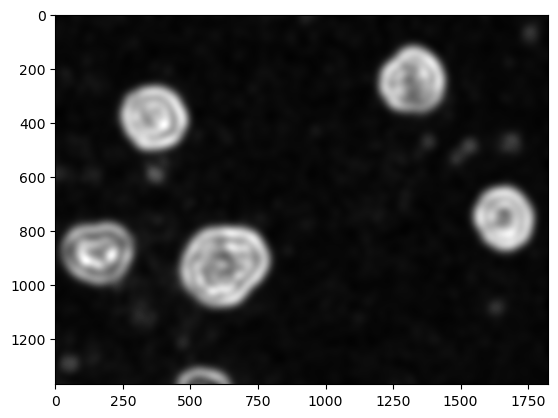

In [8]:
from skimage.filters import gaussian
gaussian = gaussian(control_bg, sigma=15)
plt.imshow(gaussian, cmap='gray')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1000x2000 with 8 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Isodata'}>,
        <AxesSubplot: title={'center': 'Li'}>,
        <AxesSubplot: title={'center': 'Mean'}>,
        <AxesSubplot: title={'center': 'Minimum'}>,
        <AxesSubplot: title={'center': 'Otsu'}>,
        <AxesSubplot: title={'center': 'Triangle'}>,
        <AxesSubplot: title={'center': 'Yen'}>], dtype=object))

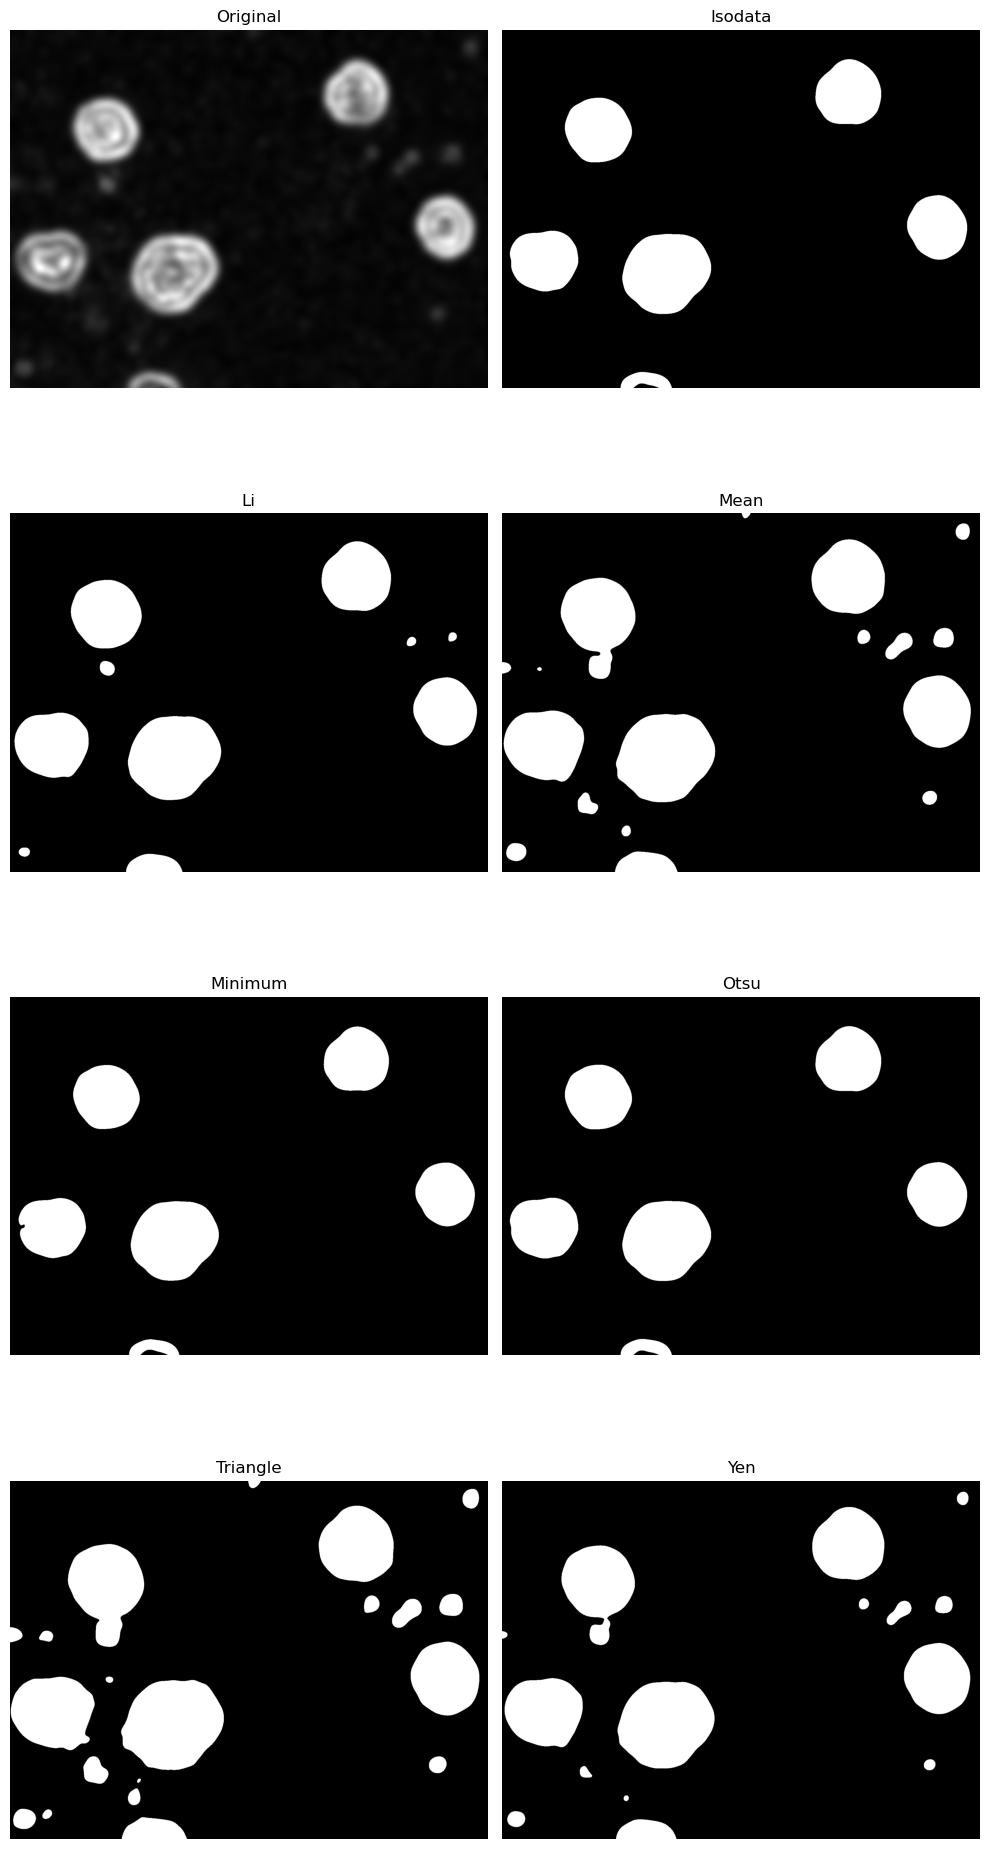

In [9]:
from skimage.filters import try_all_threshold
try_all_threshold(gaussian, figsize=(10,20))

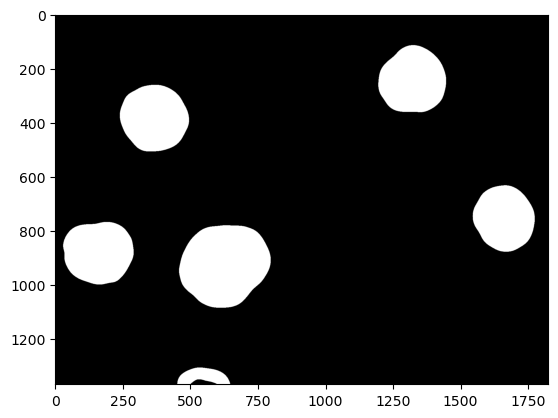

In [10]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(gaussian)
binary = gaussian >= threshold
plt.imshow(binary, cmap='gray')


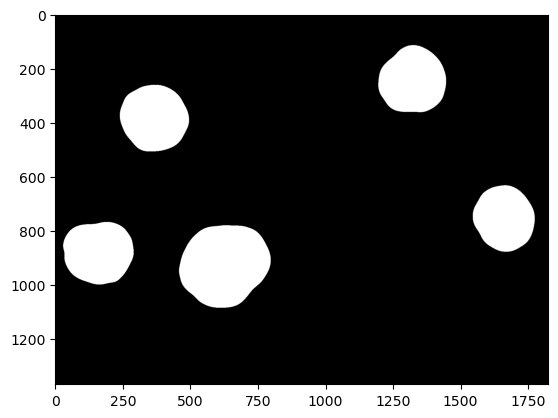

In [11]:
from skimage.morphology import remove_small_objects
removed_small = remove_small_objects(binary, 20000)
plt.imshow(removed_small, cmap='gray')

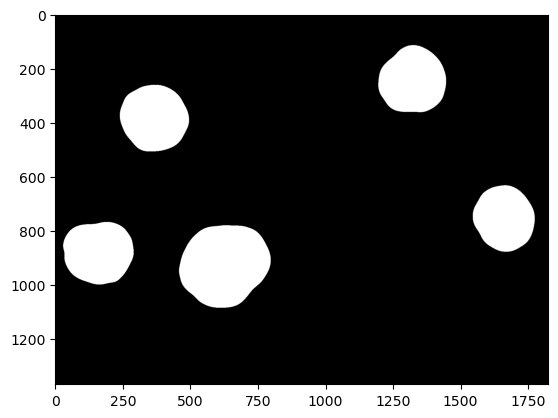

In [12]:
from scipy.ndimage import binary_fill_holes
removed_holes = binary_fill_holes(removed_small)
plt.imshow(removed_holes, cmap='gray')

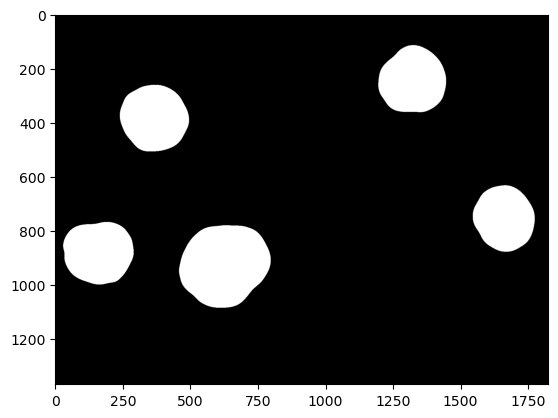

In [13]:
from skimage import segmentation
clear_border = segmentation.clear_border(removed_holes)
plt.imshow(clear_border, cmap='gray')

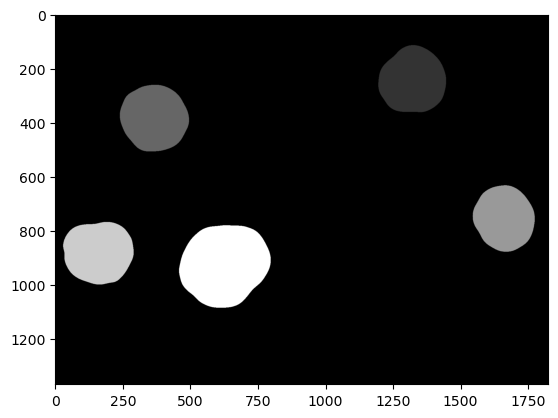

In [14]:
from skimage.morphology import label
label_image = label(clear_border)
plt.imshow(label_image, cmap='gray')

In [15]:
from skimage.measure import regionprops_table

data = regionprops_table(label_image, 
                         properties=('label', 'area', 
                                     'eccentricity'))

In [16]:
data

{'label': array([1, 2, 3, 4, 5]),
 'area': array([48649, 49098, 43057, 48405, 79668]),
 'eccentricity': array([0.25847287, 0.28807438, 0.43380723, 0.46811729, 0.49586461])}

In [17]:
import pandas as pd
df = pd.DataFrame(data) 
df

,label,area,eccentricity
0,1,48649,0.258473
1,2,49098,0.288074
2,3,43057,0.433807
3,4,48405,0.468117
4,5,79668,0.495865
